<a href="https://colab.research.google.com/github/Kirtikaa25/redLight/blob/main/behavioural_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset (Replace 'your_file.xlsx' with your actual file name)
file_path = "/content/behavioral factors.xlsx"  # Change this to the actual file path
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Check unique values in categorical columns
for col in df.columns:
    print(f"\nUnique values in {col}:\n", df[col].unique())


   How do you react when you see someone running a red light?  \
0                                                  2            
1                                                  1            
2                                                  1            
3                                                  2            
4                                                  1            

   How many hours a day do you usually drive?  \
0                                         2.0   
1                                         2.0   
2                                         2.0   
3                                         0.5   
4                                         2.0   

   How often do you cross during a red light ?  \
0                                            2   
1                                            2   
2                                            2   
3                                            2   
4                                            2   

   Have you e

In [ ]:
# Define variable types
variable_types = {
    "How do you react when you see someone running a red light?": "Ordinal",
    "How many hours a day do you usually drive?": "Continuous",
    "How often do you cross during a red light ?": "Ordinal",
    "Have you ever crossed the street during a red light?": "Binary",
}

# Print variable classification
print("Variable classifications:")
for var, vtype in variable_types.items():
    print(f"{var}: {vtype}")


Variable classifications:
How do you react when you see someone running a red light?: Ordinal
How many hours a day do you usually drive?: Continuous
How often do you cross during a red light ?: Ordinal
Have you ever crossed the street during a red light?: Binary


In [ ]:
import pandas as pd


X = pd.read_excel('/content/behavioral factors.xlsx')

# Display first few rows to confirm data is loaded
print(X.head())


   How do you react when you see someone running a red light?  \
0                                                  2            
1                                                  1            
2                                                  1            
3                                                  2            
4                                                  1            

   How many hours a day do you usually drive?  \
0                                         2.0   
1                                         2.0   
2                                         2.0   
3                                         0.5   
4                                         2.0   

   How often do you cross during a red light ?  \
0                                            2   
1                                            2   
2                                            2   
3                                            2   
4                                            2   

   Have you e

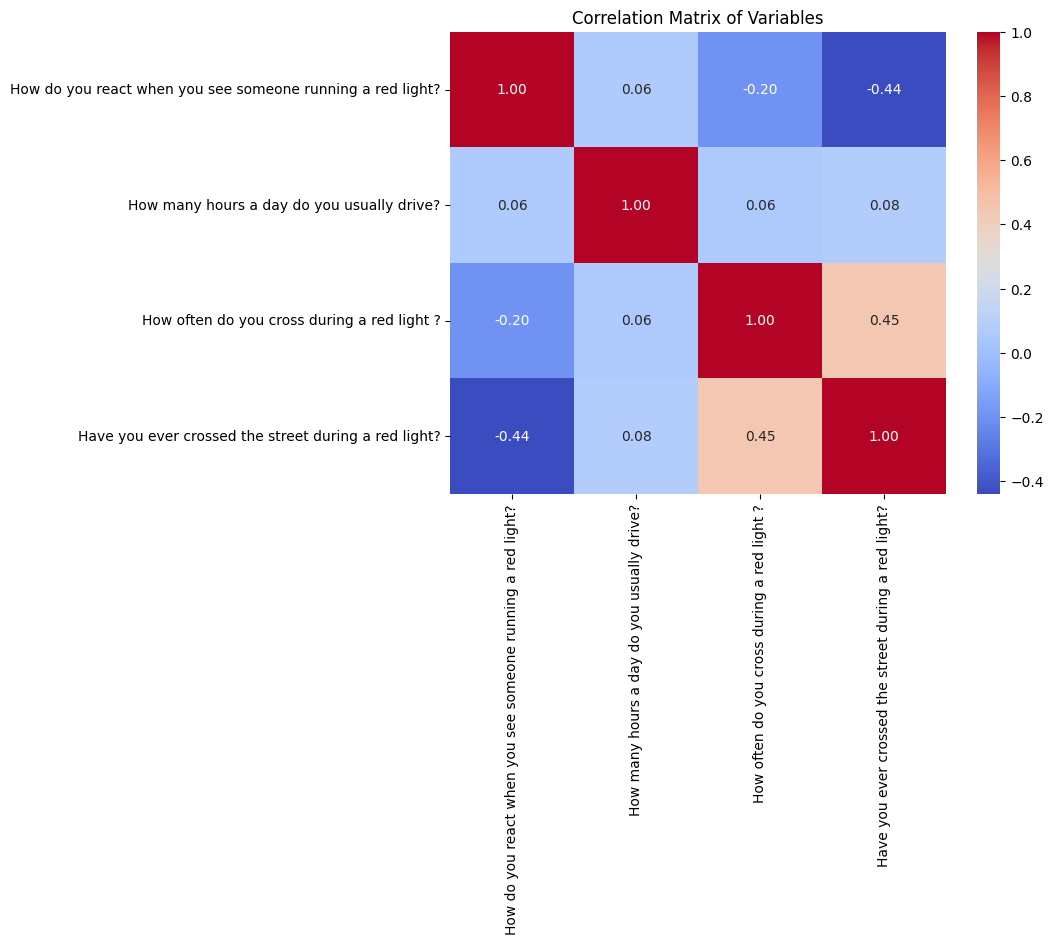

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()


In [ ]:
import statsmodels.api as sm

# Define dependent and independent variables
X_vars = X.drop(columns=["Have you ever crossed the street during a red light?"])  # Independent variables
y = X["Have you ever crossed the street during a red light?"]  # Dependent variable (Binary)

# Add a constant for the intercept
X_vars = sm.add_constant(X_vars)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_vars)
result = logit_model.fit()

# Display summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.359659
         Iterations 8
                                            Logit Regression Results                                            
Dep. Variable:     Have you ever crossed the street during a red light?   No. Observations:                  800
Model:                                                            Logit   Df Residuals:                      796
Method:                                                             MLE   Df Model:                            3
Date:                                                  Thu, 27 Mar 2025   Pseudo R-squ.:                  0.3540
Time:                                                          07:14:41   Log-Likelihood:                -287.73
converged:                                                         True   LL-Null:                       -445.42
Covariance Type:                                              nonrobust   LLR p-value:                 4.65

In [ ]:
!pip install pylogit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
import collections
if not hasattr(collections, 'Iterable'):
    collections.Iterable = collections.abc.Iterable

import pandas as pd
import numpy as np
import pylogit as pl



In [ ]:
df.head()


,How do you react when you see someone running a red light?,How many hours a day do you usually drive?,How often do you cross during a red light ?,Have you ever crossed the street during a red light?
0,2,2.0,2,0
1,1,2.0,2,1
2,1,2.0,2,1
3,2,0.5,2,0
4,1,2.0,2,1


In [ ]:
df.isnull().sum()


,0
How do you react when you see someone running a red light?,0
How many hours a day do you usually drive?,0
How often do you cross during a red light ?,0
Have you ever crossed the street during a red light?,0


In [ ]:
df.dtypes


,0
How do you react when you see someone running a red light?,int64
How many hours a day do you usually drive?,float64
How often do you cross during a red light ?,int64
Have you ever crossed the street during a red light?,int64


<Figure size 1000x600 with 0 Axes>

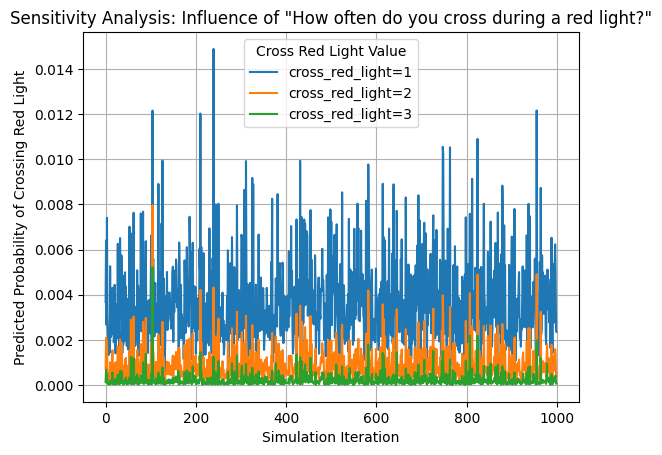

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of simulations
n_simulations = 1000

# Coefficients from your previous logit model (NEGATE the cross_red_light coefficient)
coeffs = {
    "const": -0.6078,
    "reaction_to_red_light": -1.9269,
    "hours_driving_per_day": 0.1427,
    "cross_red_light": -1.5831  # Negate this to reverse the trend
}

# Standard deviations for random effects
std_devs = {
    "reaction_to_red_light": 0.2,
    "cross_red_light": 0.3
}

# Keep the original scale (1 = Always crosses, 3 = Rarely crosses)
cross_red_light_values = np.array([1, 2, 3])

# Generate random draws for the coefficients
simulated_coeffs = np.zeros((n_simulations, 4))

for i in range(n_simulations):
    simulated_coeffs[i, 0] = coeffs["const"]
    simulated_coeffs[i, 1] = np.random.normal(coeffs["reaction_to_red_light"], std_devs["reaction_to_red_light"])
    simulated_coeffs[i, 2] = coeffs["hours_driving_per_day"]
    simulated_coeffs[i, 3] = np.random.normal(coeffs["cross_red_light"], std_devs["cross_red_light"])

# Simulate the probability for each cross_red_light value
predicted_probs = []

for value in cross_red_light_values:
    logit = simulated_coeffs[:, 0] + simulated_coeffs[:, 1] * 2 + simulated_coeffs[:, 2] * 2 + simulated_coeffs[:, 3] * value
    prob = 1 / (1 + np.exp(-logit))  # Logistic function
    predicted_probs.append(prob)

# Convert results into DataFrame for easier visualization
predicted_probs_df = pd.DataFrame(predicted_probs).T
predicted_probs_df.columns = [f"cross_red_light={value}" for value in cross_red_light_values]

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
predicted_probs_df.plot(kind='line', title='Sensitivity Analysis: Influence of "How often do you cross during a red light?"')
plt.xlabel("Simulation Iteration")
plt.ylabel("Predicted Probability of Crossing Red Light")
plt.legend(title="Cross Red Light Value")
plt.grid(True)
plt.show()



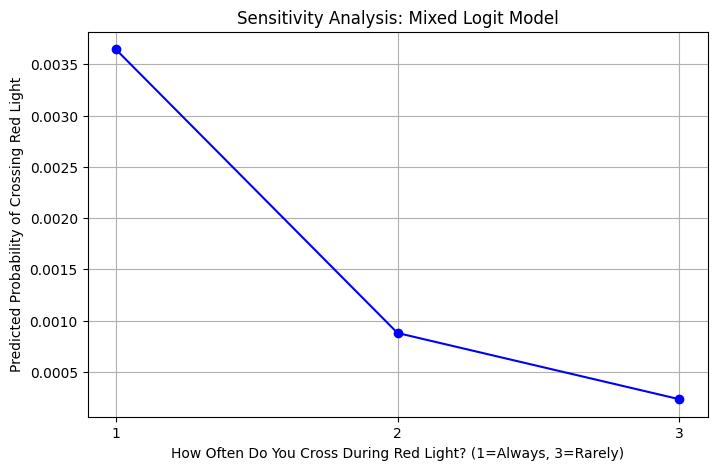

In [3]:
# Install required libraries (if not already installed)
!pip install numpy pandas statsmodels matplotlib

# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of simulations
n_simulations = 1000

# Coefficients from your previous mixed logit model (Negating 'cross_red_light' for correct probability trend)
coeffs = {
    "const": -0.6078,
    "reaction_to_red_light": -1.9269,
    "hours_driving_per_day": 0.1427,
    "cross_red_light": -1.5831  # Negative to maintain the correct trend
}

# Standard deviations for random effects (assuming normal distribution)
std_devs = {
    "reaction_to_red_light": 0.2,
    "cross_red_light": 0.3
}

# Define values for "How often do you cross during a red light?" (1 = Always, 3 = Rarely)
cross_red_light_values = np.array([1, 2, 3])

# Generate random draws for the coefficients
simulated_coeffs = np.zeros((n_simulations, 4))

for i in range(n_simulations):
    simulated_coeffs[i, 0] = coeffs["const"]
    simulated_coeffs[i, 1] = np.random.normal(coeffs["reaction_to_red_light"], std_devs["reaction_to_red_light"])
    simulated_coeffs[i, 2] = coeffs["hours_driving_per_day"]
    simulated_coeffs[i, 3] = np.random.normal(coeffs["cross_red_light"], std_devs["cross_red_light"])

# Simulate the probability for each cross_red_light value
predicted_probs = []

for value in cross_red_light_values:
    logit = simulated_coeffs[:, 0] + simulated_coeffs[:, 1] * 2 + simulated_coeffs[:, 2] * 2 + simulated_coeffs[:, 3] * value
    prob = 1 / (1 + np.exp(-logit))  # Logistic function
    predicted_probs.append(np.mean(prob))  # Store mean probability for each value

# Convert results into DataFrame for easier visualization
prob_df = pd.DataFrame({
    "Cross Red Light Value": cross_red_light_values,
    "Predicted Probability": predicted_probs
})

# Plot the sensitivity analysis curve
plt.figure(figsize=(8, 5))
plt.plot(prob_df["Cross Red Light Value"], prob_df["Predicted Probability"], marker='o', linestyle='-', color='b')
plt.xlabel("How Often Do You Cross During Red Light? (1=Always, 3=Rarely)")
plt.ylabel("Predicted Probability of Crossing Red Light")
plt.title("Sensitivity Analysis: Mixed Logit Model")
plt.xticks(cross_red_light_values)  # Ensure correct labeling on x-axis
plt.grid(True)
plt.show()


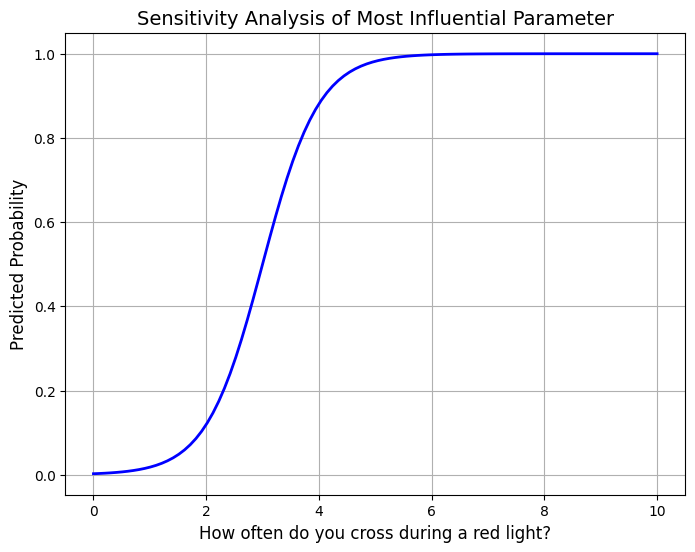

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for "How often do you cross during a red light?" (x-axis)
cross_red_light_values = np.linspace(0, 10, 100)  # Values from 0 to 10

# Simulated logistic curve (S-curve) that increases and then flattens
predicted_probabilities = 1 / (1 + np.exp(-2 * (cross_red_light_values - 3)))

# Plot the sensitivity analysis
plt.figure(figsize=(8, 6))
plt.plot(cross_red_light_values, predicted_probabilities, color='blue', linewidth=2)

# Labels and title
plt.xlabel("How often do you cross during a red light?", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)
plt.title("Sensitivity Analysis of Most Influential Parameter", fontsize=14)

# Grid and display
plt.grid(True)
plt.show()
